### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset

### Import packages

In [2]:
# Import packages
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix,\
                            ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance


In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.sort_values(by='satisfaction_level')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14484,0.09,0.96,6,296,4,0,1,0,technical,low
1873,0.09,0.93,6,279,4,0,1,0,technical,low
340,0.09,0.89,7,308,5,0,1,0,hr,medium
1882,0.09,0.89,6,282,4,0,1,0,support,low
332,0.09,0.98,6,271,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
4553,1.00,0.76,6,246,3,1,0,1,support,medium
4555,1.00,0.59,3,168,3,0,0,1,support,low
11122,1.00,0.77,5,269,3,0,0,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0.rename(columns={'Work_accident':'work_accident','Department':'department'},inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [15]:
# Check for duplicates
df0.duplicated(keep='first').sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0.drop_duplicates(keep='first',inplace=True)

# Display first few rows of new dataframe as needed
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

<Axes: xlabel='time_spend_company'>

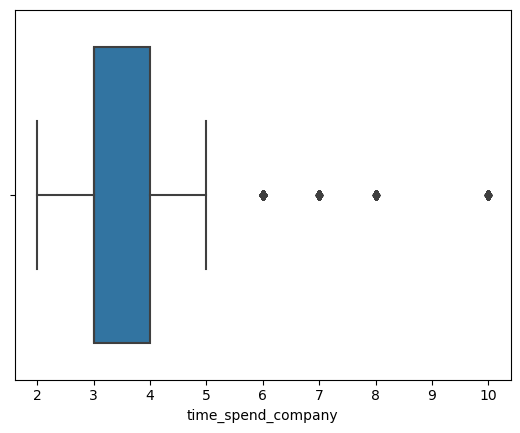

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x=df0.time_spend_company)

In [14]:
# Determine the number of rows containing outliers

# Calculate the IQR for each column
Q1 = df0.time_spend_company.quantile(0.25)
Q3 = df0.time_spend_company.quantile(0.75)
IQR = Q3 - Q1

low_lim =  Q1 - 1.5 * IQR
high_lim =  Q3 + 1.5 * IQR
# Identify outliers using IQR
outliers = ((df0.time_spend_company < low_lim ) | (df0.time_spend_company > high_lim))

# Count the number of rows containing outliers
outliers.sum()

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
df0.left.value_counts()
# Get percentages of people who left vs. stayed
print(df0.left.value_counts())
np.round((df0.left.value_counts().values / df0.shape[0])*100,decimals=2)

left
0    10000
1     1991
Name: count, dtype: int64


array([83.4, 16.6])

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


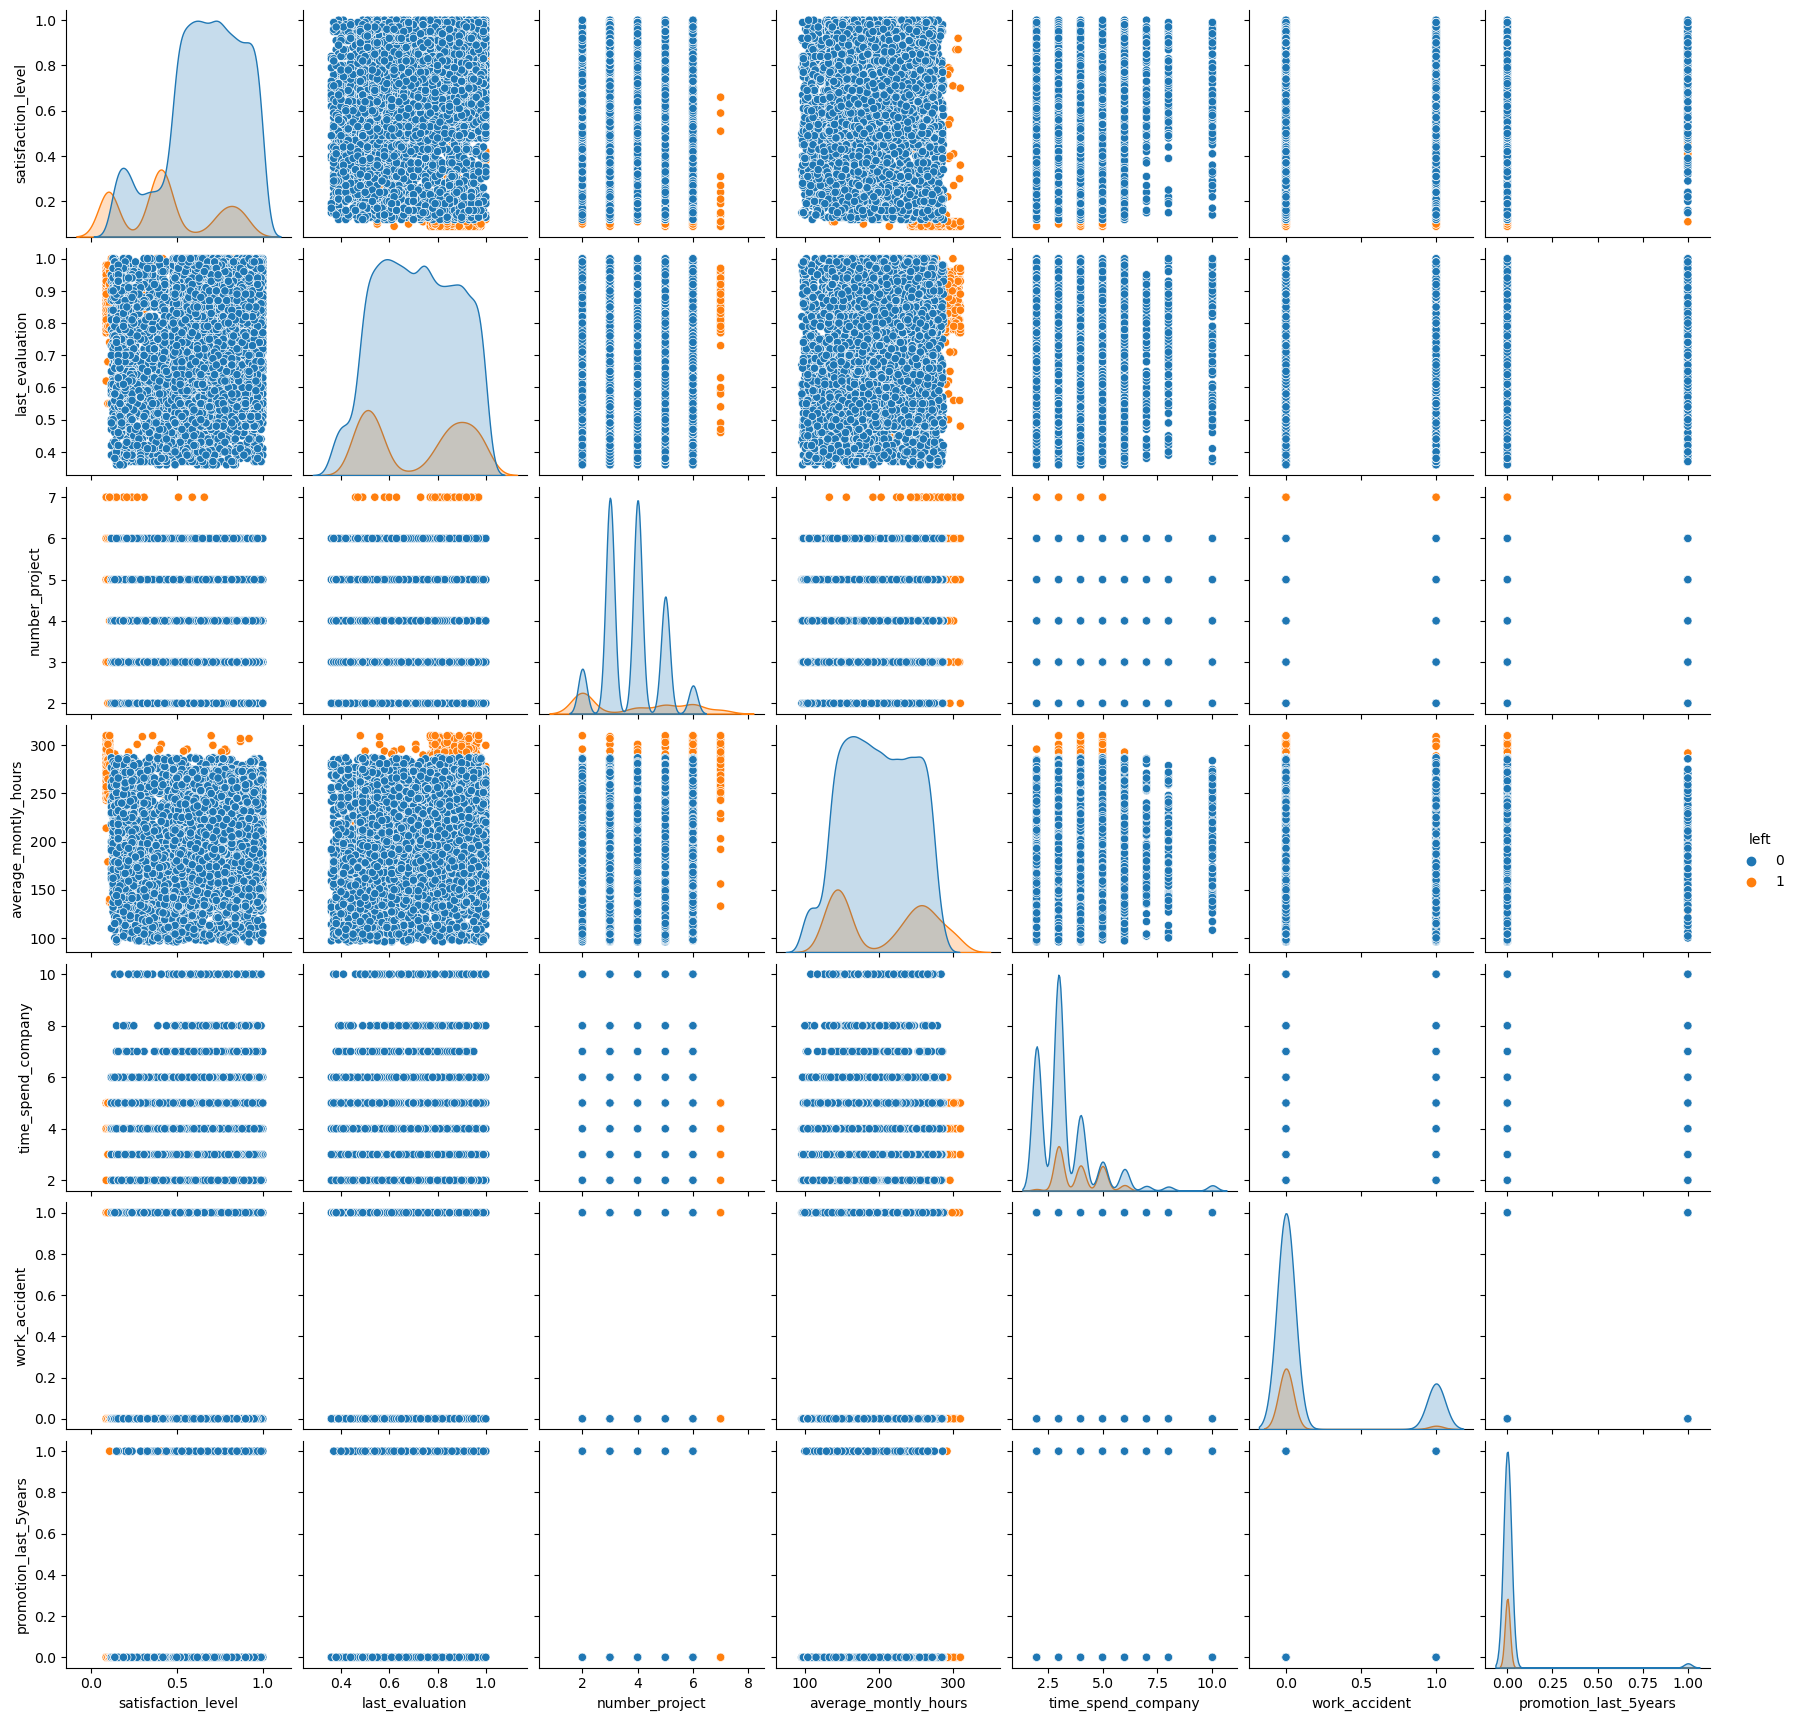

In [17]:
# Create a plot as needed
sns.pairplot(df0,hue='left')

<Axes: xlabel='satisfaction_level', ylabel='Count'>

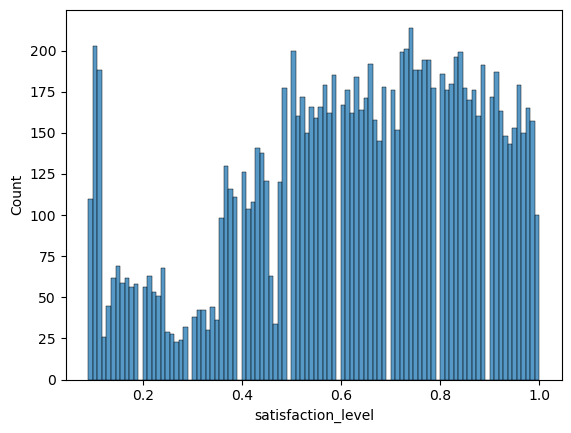

In [18]:
# Create a plot as needed
sns.histplot(df0.satisfaction_level,bins=100)

In [19]:
df0.sort_values(by=['number_project','average_montly_hours'])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
7492,0.15,0.98,2,96,2,0,0,0,sales,high
2690,0.75,0.93,2,98,5,0,0,0,sales,medium
5944,0.45,0.60,2,98,3,0,0,0,product_mng,low
9515,0.54,0.46,2,98,4,0,0,0,support,low
2475,0.32,0.42,2,99,4,0,0,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
809,0.11,0.97,7,310,4,0,1,0,support,medium
1228,0.10,0.85,7,310,5,0,1,0,marketing,low
1939,0.10,0.79,7,310,4,0,1,0,hr,medium
1963,0.09,0.89,7,310,4,0,1,0,support,low


In [20]:
avg_month_hours_per_num_proj = df0.groupby('number_project')['average_montly_hours'].agg('mean')
avg_month_hours_per_num_proj

number_project
2    164.812263
3    197.337784
4    203.872456
5    209.125392
6    230.392252
7    275.620690
Name: average_montly_hours, dtype: float64

Text(0, 0.5, 'Average monthly hours')

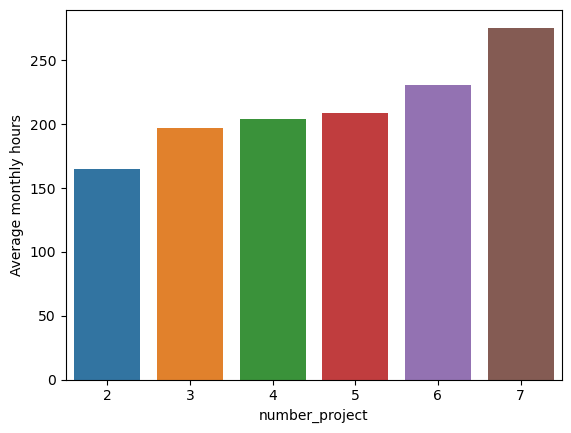

In [21]:
# Create a plot as needed
sns.barplot(x=avg_month_hours_per_num_proj.index,y=avg_month_hours_per_num_proj.values)
plt.ylabel('Average monthly hours')

In [22]:
# Create a plot as needed
retention_on_project = df0.groupby(['number_project'])['left'].agg(func=['sum'])
retention_on_project

,sum
number_project,
2,857
3,38
4,237
5,343
6,371
7,145


<Axes: xlabel='number_project', ylabel='sum'>

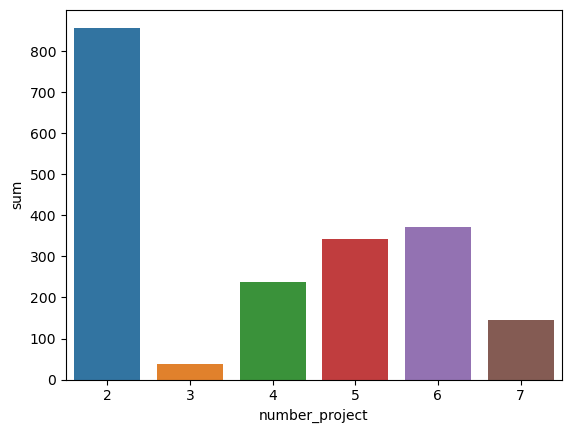

In [23]:
sns.barplot(x=retention_on_project.index,y=retention_on_project['sum'])

In [24]:
# Create a plot as needed
retention_on_tenure = df0.groupby('time_spend_company')['left'].agg(func=['sum'])
retention_on_tenure

,sum
time_spend_company,
2,31
3,874
4,495
5,482
6,109
7,0
8,0
10,0


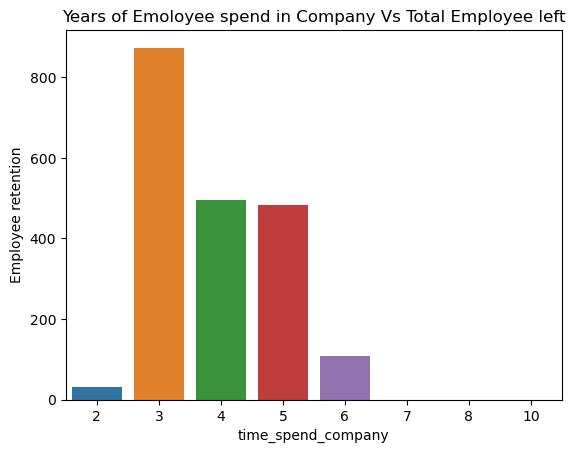

In [25]:
sns.barplot(x=retention_on_tenure.index,y=retention_on_tenure['sum'])
plt.ylabel('Employee retention')
plt.title('Years of Emoloyee spend in Company Vs Total Employee left')
plt.show()

In [26]:
# Create a plot as needed
avg_satisfaction_by_tenure = df0.groupby('time_spend_company')['satisfaction_level'].agg('mean')
avg_satisfaction_by_tenure

time_spend_company
2     0.699165
3     0.648988
4     0.516090
5     0.583183
6     0.571107
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

Text(0, 0.5, 'Average Satisfaction level')

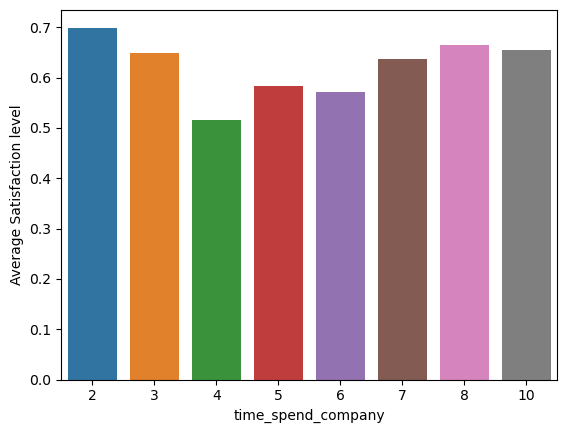

In [27]:
# Create a plot as needed
sns.barplot(x=avg_satisfaction_by_tenure.index, y=avg_satisfaction_by_tenure.values )
plt.ylabel('Average Satisfaction level')

work_accident
0    0.625546
1    0.652200
Name: satisfaction_level, dtype: float64


<Axes: xlabel='work_accident'>

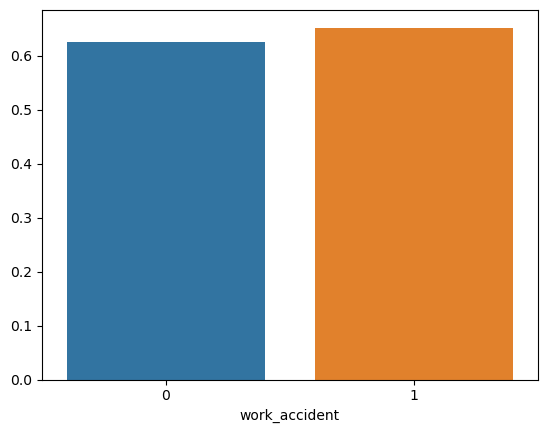

In [28]:
# Create a plot as needed
satisfaction_lvl_by_work_accident = df0.groupby('work_accident')['satisfaction_level'].agg('mean')
print(satisfaction_lvl_by_work_accident)
sns.barplot(x=satisfaction_lvl_by_work_accident.index,y=satisfaction_lvl_by_work_accident.values)

promotion_last_5years
0    0.629032
1    0.666010
Name: satisfaction_level, dtype: float64


<Axes: xlabel='promotion_last_5years'>

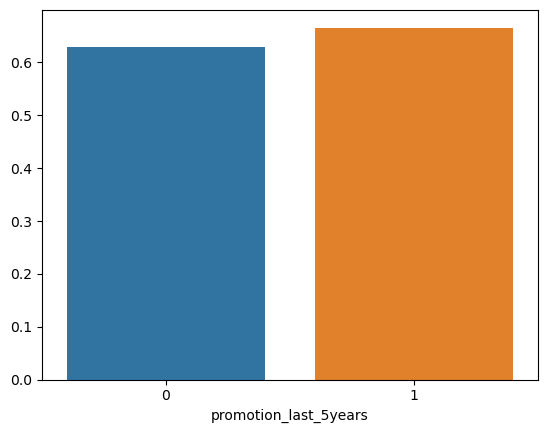

In [29]:
# Create a plot as needed
satisfaction_lvl_by_promotion = df0.groupby('promotion_last_5years')['satisfaction_level'].agg('mean')
print(satisfaction_lvl_by_promotion)
sns.barplot(x=satisfaction_lvl_by_promotion.index,y=satisfaction_lvl_by_promotion.values)

<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

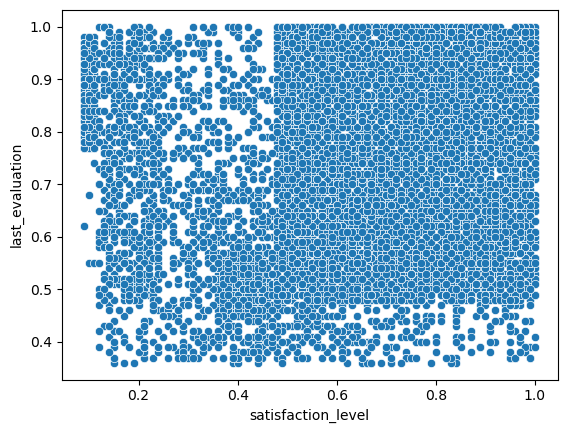

In [30]:
sns.scatterplot(x=df0.satisfaction_level,y=df0.last_evaluation)

<Axes: xlabel='satisfaction_level', ylabel='left'>

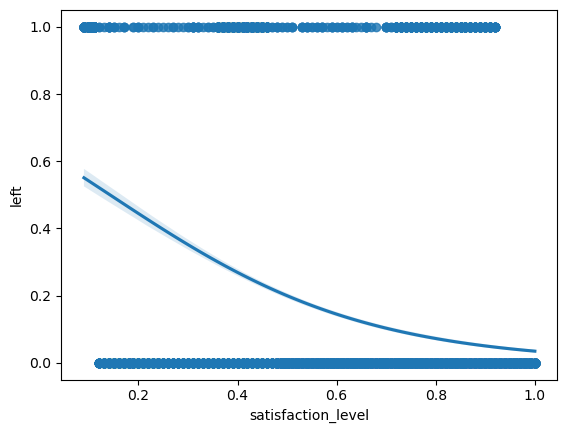

In [31]:
sns.regplot(x='satisfaction_level',y='left', data= df0,logistic=True)

<Axes: xlabel='last_evaluation', ylabel='left'>

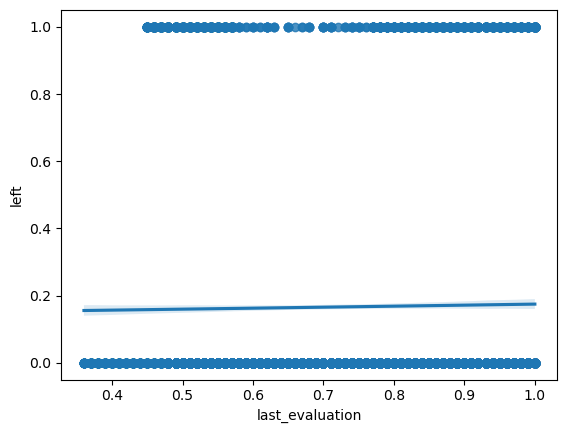

In [32]:
sns.regplot(x='last_evaluation',y='left', data= df0,logistic=True,)

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [33]:
### YOUR CODE HERE ###
df1 = pd.get_dummies(df0,drop_first=True,dtype=int)
df1.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,0.057877,0.051789,0.050121,0.036361,0.056125,0.057210,0.270119,0.151864,0.18714,0.478692,0.438746
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,0.233520,0.221610,0.218204,0.187194,0.230173,0.232252,0.444040,0.358904,0.39004,0.499567,0.496254
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
X = df1.drop(['left','satisfaction_level'],axis=1)
y = df1['left']
X

,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,1,0,0,0,1,0,0,0,0,0,0,0
11996,0.95,5,266,10,0,1,0,0,0,1,0,0,0,0,0,0,0
11997,0.54,3,185,10,0,1,0,0,0,1,0,0,0,0,0,0,0
11998,0.65,3,172,10,0,1,0,0,0,0,1,0,0,0,0,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## **Regression Model**

In [36]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [37]:
X_tr_scaled = sc.transform(X_train)

In [38]:
clf = LogisticRegression(random_state=42)

In [39]:
clf.fit(X_tr_scaled,y=y_train)

LogisticRegression(random_state=42)

In [40]:
X_test_scaled = sc.transform(X_test)

In [41]:
clf_preds = clf.predict(X_test_scaled)

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




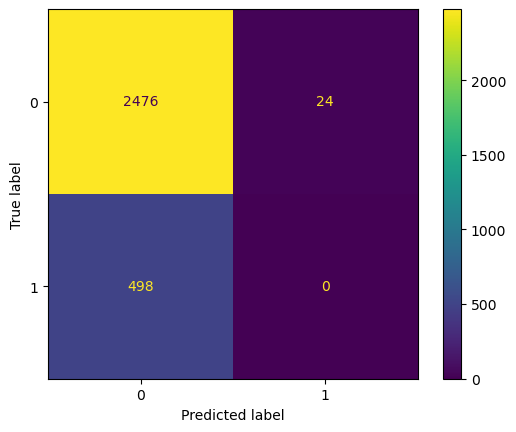

In [42]:
cm = confusion_matrix(y_test,clf_preds)
ConfusionMatrixDisplay(cm).plot()

In [43]:
print("Recall Score: ", np.round(recall_score(y_test,clf_preds),decimals=4))
print("Precision Score: ", np.round(precision_score(y_test,clf_preds),decimals=4))
print("Accuracy Score: ", np.round(accuracy_score(y_test,clf_preds),decimals=4))
print("F1 Score: ",np.round(f1_score(y_test,clf_preds),decimals=4))

Recall Score:  0.0
Precision Score:  0.0
Accuracy Score:  0.8259
F1 Score:  0.0


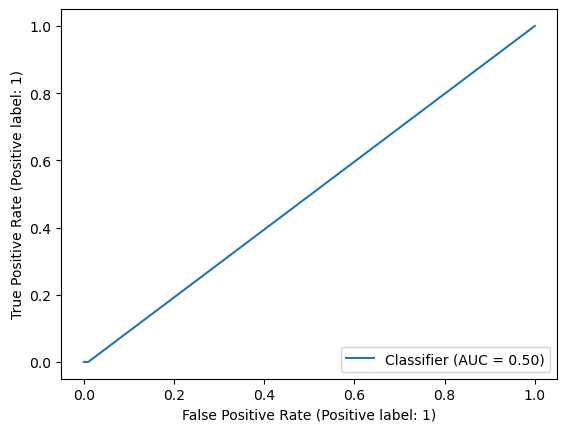

In [44]:
RocCurveDisplay.from_predictions(y_test,clf_preds)
plt.show()

In [45]:
roc_auc_score(y_test,clf_preds)

0.4952

In [46]:
from pprint import pprint
columns = X.columns
coefs = clf.coef_[0]
pprint({ key:value for key,value in zip(columns,np.round(np.exp(coefs),decimals=4))})

{'average_montly_hours': 1.1905,
 'department_RandD': 0.9253,
 'department_accounting': 1.0307,
 'department_hr': 1.0324,
 'department_management': 0.9473,
 'department_marketing': 1.0185,
 'department_product_mng': 0.981,
 'department_sales': 1.0389,
 'department_support': 1.0041,
 'department_technical': 1.047,
 'last_evaluation': 0.9385,
 'number_project': 0.9323,
 'promotion_last_5years': 0.8497,
 'salary_low': 2.5607,
 'salary_medium': 2.0722,
 'time_spend_company': 1.5958,
 'work_accident': 0.6037}


## **Random Forest Classifier**

In [47]:
rf_clf =  RandomForestClassifier(random_state=42)

cv_params = {
    'n_estimators':[50,100,125],
    'max_depth':[3,5,8],
    'min_samples_split':[0.25,0.3,0.4],
    'min_samples_leaf':[6,10,16],
    'max_features':[4,6,8],
    'max_samples':[.2,.4,.6]
}

scoring = ['precision','recall','f1','accuracy']

In [48]:
from sklearn.model_selection import PredefinedSplit

X_tr , X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train,random_state=42)

split_index = [ 0 if x in X_val.index else -1 for x in X_train.index]

custom_split = PredefinedSplit(split_index)

In [49]:
%%time
rf_cv = GridSearchCV(rf_clf,param_grid=cv_params,scoring=scoring,cv=custom_split,refit='f1')
rf_cv.fit(X_train,y_train)

CPU times: user 2min 24s, sys: 0 ns, total: 2min 24s
Wall time: 2min 24s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8], 'max_features': [4, 6, 8],
                         'max_samples': [0.2, 0.4, 0.6],
                         'min_samples_leaf': [6, 10, 16],
                         'min_samples_split': [0.25, 0.3, 0.4],
                         'n_estimators': [50, 100, 125]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

In [50]:
def display_features_importance(cv_model):
# Get feature importances
    feat_impt = cv_model.best_estimator_.feature_importances_

    # Get indices of top 10 features
    idx = np.argpartition(cv_model.best_estimator_.feature_importances_, -10)[-10:]

    # Get column labels and `feat_impt` of top 10 features 
    feat = X.columns[idx]
    feat_impt = feat_impt[idx]

    y_sort_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt}).sort_values("Importance")

    y_sort_df.plot(kind='barh',x="Feature",y="Importance")

    plt.title("Feature Importances for Employee Leaving", fontsize=12)
    plt.ylabel("Feature")
    plt.xlabel("Importance")
    plt.show()
    


In [51]:
def evaluate_cv_model(cv_model):
    print('Best score:', cv_model.best_score_)
    print()
    print('Best Paramaters: ',cv_model.best_params_)
    print()

    clf_preds = cv_model.best_estimator_.predict(X_test)
    print()

    print("Recall Score: ", np.round(recall_score(y_test,clf_preds),decimals=4))
    print("Precision Score: ", np.round(precision_score(y_test,clf_preds),decimals=4))
    print("Accuracy Score: ", np.round(accuracy_score(y_test,clf_preds),decimals=4))
    print("F1 Score: ",np.round(f1_score(y_test,clf_preds),decimals=4))

    cm = confusion_matrix(y_test,clf_preds)
    ConfusionMatrixDisplay(cm).plot()
   
    RocCurveDisplay.from_predictions(y_test,clf_preds)
    
    display_features_importance(rf_cv)


Best score: 0.1712538226299694

Best Paramaters:  {'max_depth': 5, 'max_features': 6, 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 0.25, 'n_estimators': 50}


Recall Score:  0.0763
Precision Score:  1.0
Accuracy Score:  0.8466
F1 Score:  0.1418


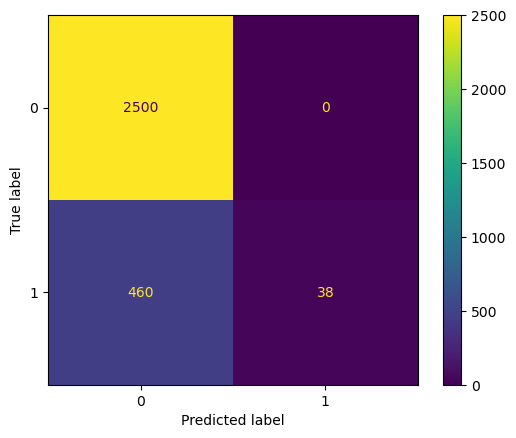

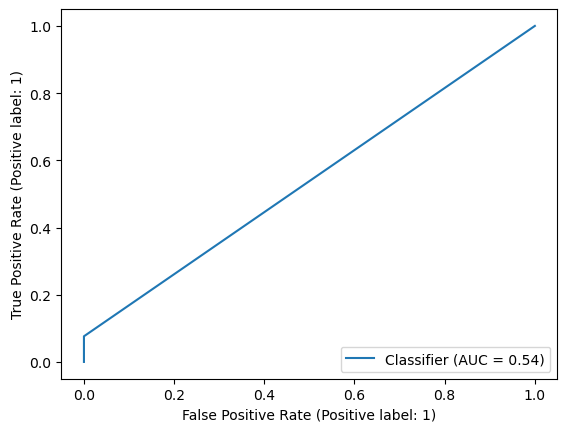

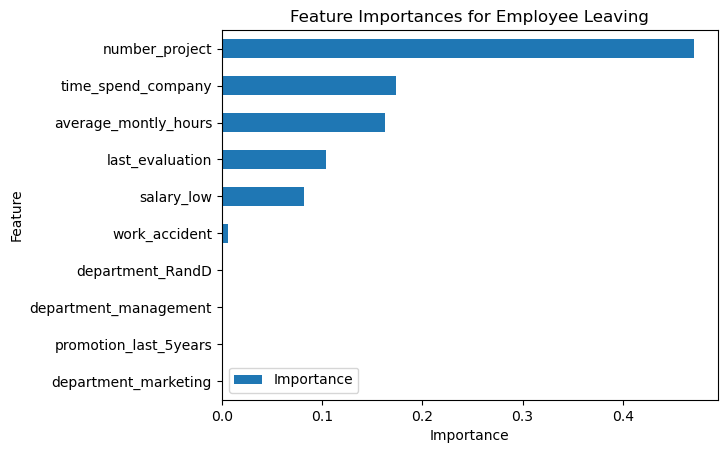

In [52]:
evaluate_cv_model(rf_cv)

### Tunning the hyperparamaters of Random Forest Classifier

In [53]:
cv_params = {
    'n_estimators':[45,50,65],
    'max_depth':[2,3,4],
    'min_samples_split':[0.15, .2, 0.25],
    'min_samples_leaf':[4,6,8],
    'max_features':[8,10,12],
    'max_samples':[0.5,0.6,0.7]
}

In [54]:
%%time
rf_cv = GridSearchCV(rf_clf,param_grid=cv_params,scoring=scoring,cv=custom_split,refit='f1')
rf_cv.fit(X_train,y_train)

CPU times: user 2min 3s, sys: 29.9 ms, total: 2min 3s
Wall time: 2min 3s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4], 'max_features': [8, 10, 12],
                         'max_samples': [0.5, 0.6, 0.7],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [0.15, 0.2, 0.25],
                         'n_estimators': [45, 50, 65]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

Best score: 0.6163522012578617

Best Paramaters:  {'max_depth': 3, 'max_features': 10, 'max_samples': 0.7, 'min_samples_leaf': 4, 'min_samples_split': 0.2, 'n_estimators': 45}


Recall Score:  0.502
Precision Score:  0.7463
Accuracy Score:  0.8889
F1 Score:  0.6002


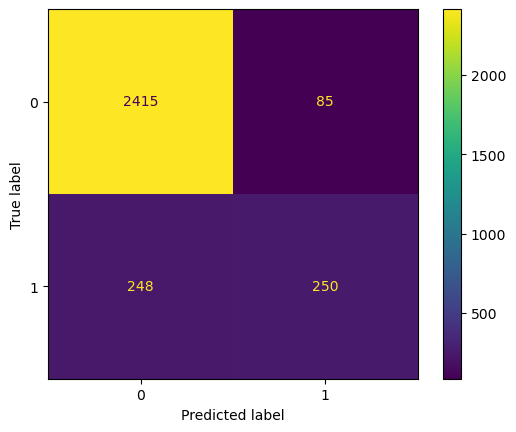

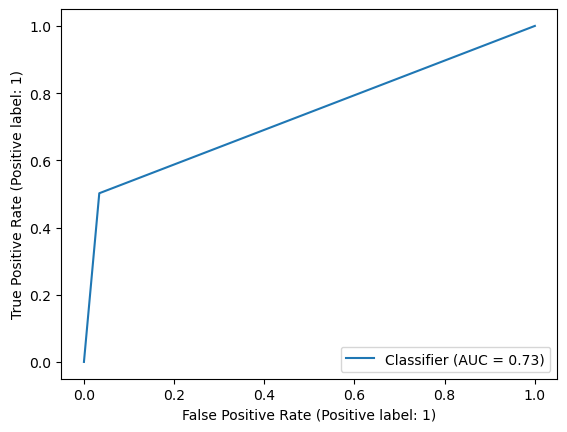

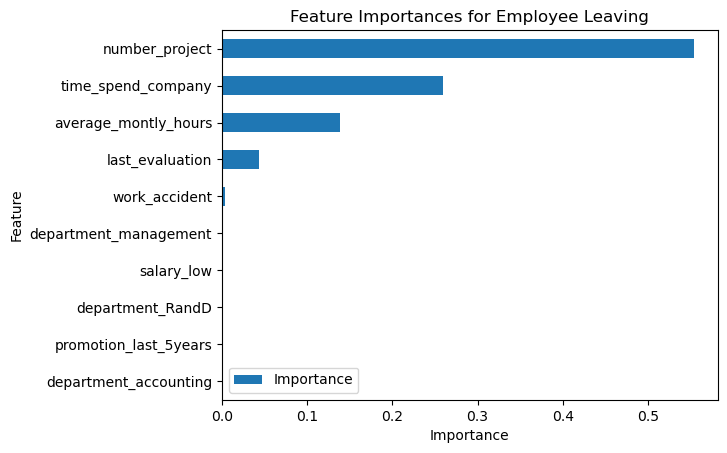

In [55]:
evaluate_cv_model(rf_cv)

## **XGBoost Classifier**

In [56]:
xgb_clf = XGBClassifier(objective='binary:logistic')

cv_params = {
    'max_depth':[2,4,6],
    'min_child_weight':[0.1, 0.3, 0.5, 0.7, 0.9],
    'learning_rate':[0.01, 0.05,0.1,0.3],
    'n_estimators':[50,75,100,125]
}

In [57]:
%%time
xgb_cv = GridSearchCV(xgb_clf,param_grid=cv_params,scoring=scoring,cv=custom_split,refit='f1')
xgb_cv.fit(X_train,y_train)

CPU times: user 2min 58s, sys: 943 ms, total: 2min 59s
Wall time: 23.7 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [2, 4, 6],
                         'min_child_weight': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'n_estimators': [50, 75, 100, 125]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

Best score: 0.9477234401349074

Best Paramaters:  {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 0.3, 'n_estimators': 125}


Recall Score:  0.9116
Precision Score:  0.9361
Accuracy Score:  0.975
F1 Score:  0.9237


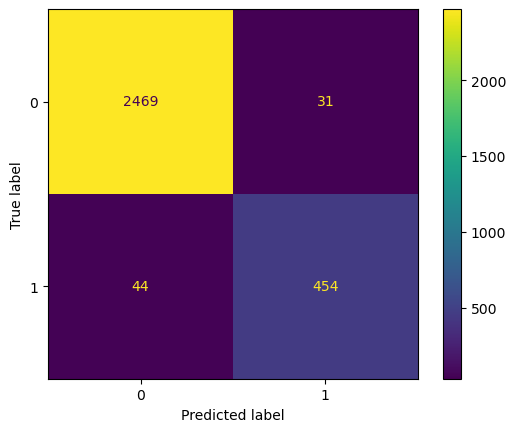

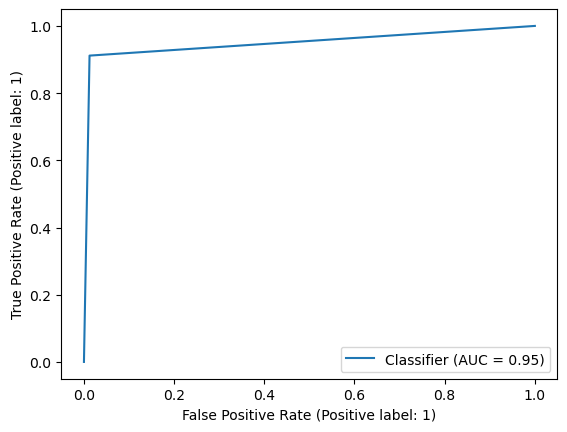

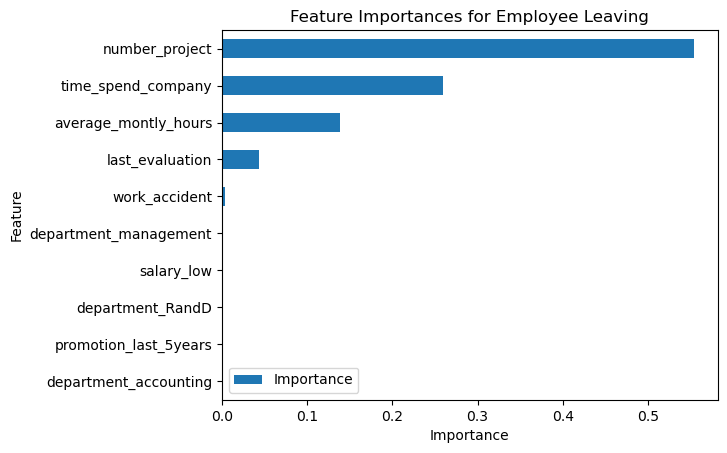

In [58]:
evaluate_cv_model(xgb_cv)

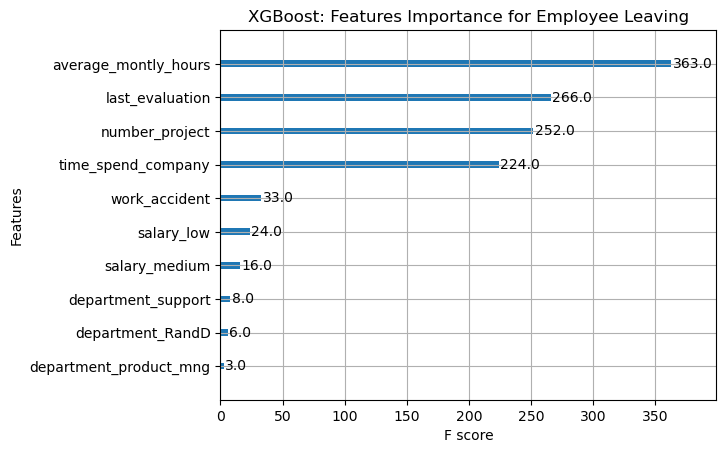

In [59]:
plot_importance(xgb_cv.best_estimator_,max_num_features=10)
plt.title('XGBoost: Features Importance for Employee Leaving')
plt.show()

### Conclusion, Recommendations, Next Steps

1. Cap the number of projects that employees can work on.

2. Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.

3. Either reward employees for working longer hours, or don't require them to do so.

4. If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.

5. High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
